In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [150]:
df=pd.read_csv("Life Expectancy Data.csv")

# 1. Cleaning

In [151]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

##### There are some flaws in this dataset. First, the names of columns are inconsistent. Second, the column `Non - Null Count` shows that there are some missing values.

## a. Correct names of columns

In [153]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [154]:
df.columns=df.columns.str.strip().str.title()
df.columns

Index(['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', 'Bmi', 'Under-Five Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'Hiv/Aids', 'Gdp', 'Population', 'Thinness  1-19 Years',
       'Thinness 5-9 Years', 'Income Composition Of Resources', 'Schooling'],
      dtype='object')

In [155]:
df.rename(columns={'Bmi':'BMI','Hiv/Aids':'HIV/AIDS','Gdp':'GDP'},inplace=True)

In [156]:
df.columns

Index(['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-Five Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness  1-19 Years',
       'Thinness 5-9 Years', 'Income Composition Of Resources', 'Schooling'],
      dtype='object')

## b. Missing values

In [157]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life Expectancy                     10
Adult Mortality                     10
Infant Deaths                        0
Alcohol                            194
Percentage Expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
Under-Five Deaths                    0
Polio                               19
Total Expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness  1-19 Years                34
Thinness 5-9 Years                  34
Income Composition Of Resources    167
Schooling                          163
dtype: int64

###### Replace missing values by mean value of the others

In [158]:
df.columns

Index(['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-Five Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness  1-19 Years',
       'Thinness 5-9 Years', 'Income Composition Of Resources', 'Schooling'],
      dtype='object')

In [159]:
cols_to_fill=['Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-Five Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness  1-19 Years',
       'Thinness 5-9 Years', 'Income Composition Of Resources', 'Schooling']

In [160]:
df[cols_to_fill]=df[cols_to_fill].fillna(df[cols_to_fill].mean())

In [161]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life Expectancy                    0
Adult Mortality                    0
Infant Deaths                      0
Alcohol                            0
Percentage Expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
Under-Five Deaths                  0
Polio                              0
Total Expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness  1-19 Years               0
Thinness 5-9 Years                 0
Income Composition Of Resources    0
Schooling                          0
dtype: int64

# 2. Visualizations

###### We will work with the numeric data, stored in the dataframe `num_df`

In [162]:
num_df=df[cols_to_fill]
num_df.head()

,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-Five Deaths,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition Of Resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


<AxesSubplot:>

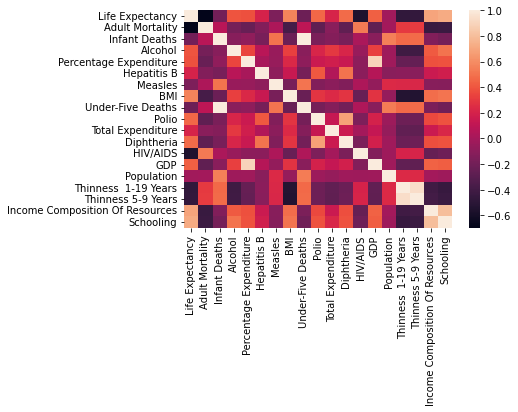

In [163]:
sns.heatmap(num_df.corr())

###### The correlation between `Infant Deaths` and `Under-Five Deaths` is quite trivial. There are 4 correlation worth considered, 

- `Life Expectancy` vs `Income Composition Of Resources`
- `Life Expectancy` vs `Schooling`
- `Income Composition Of Resources` vs `Schooling`
- `GDP` vs `Percentage Expenditure`

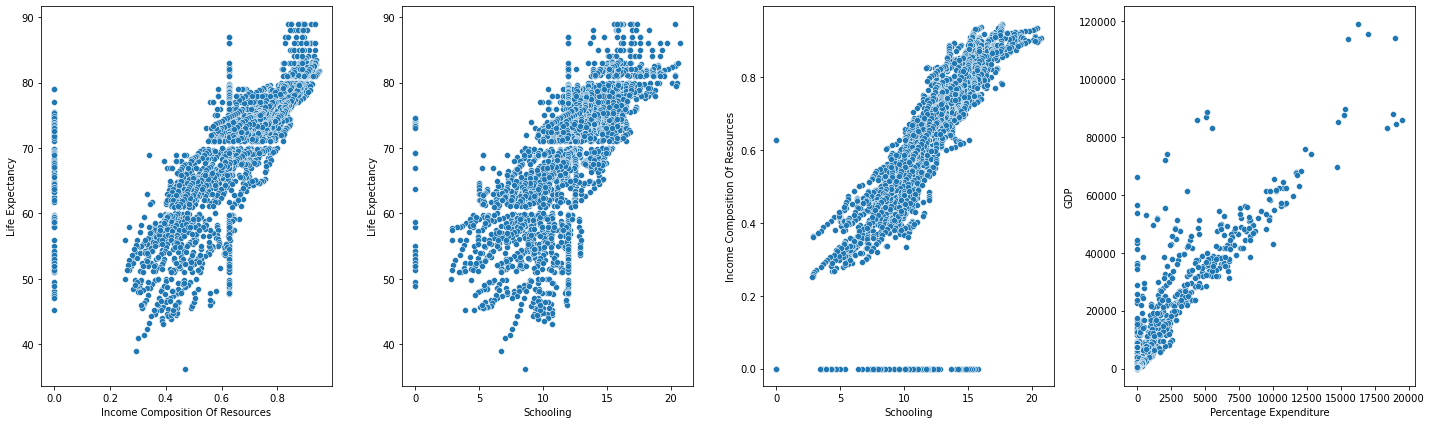

In [164]:
fig,ax=plt.subplots(ncols=4,nrows=1,figsize=(20,6))
sns.scatterplot(y=num_df['Life Expectancy'],x=num_df['Income Composition Of Resources'],ax=ax[0])
sns.scatterplot(y=num_df['Life Expectancy'],x=num_df['Schooling'],ax=ax[1])
sns.scatterplot(y=num_df['Income Composition Of Resources'],x=num_df['Schooling'],ax=ax[2])
sns.scatterplot(y=num_df['GDP'],x=num_df['Percentage Expenditure'],ax=ax[3])
plt.tight_layout()

###### We will work with `GDP` and `Percentage Expenditure`

In [165]:
num_df

,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-Five Deaths,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition Of Resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


<AxesSubplot:xlabel='Percentage Expenditure', ylabel='GDP'>

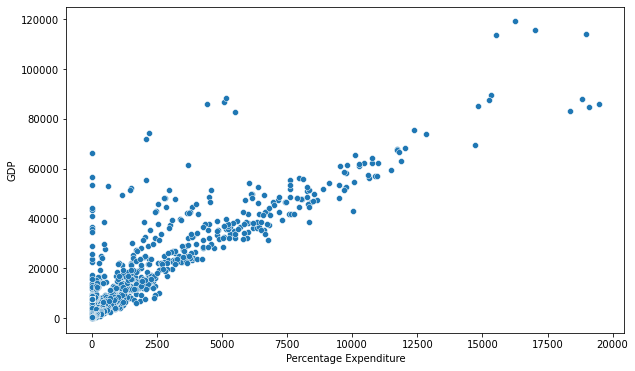

In [166]:
fig=plt.figure(figsize=(10,6))
sns.scatterplot(y=num_df['GDP'], x=num_df['Percentage Expenditure'])

<AxesSubplot:xlabel='Percentage Expenditure', ylabel='GDP'>

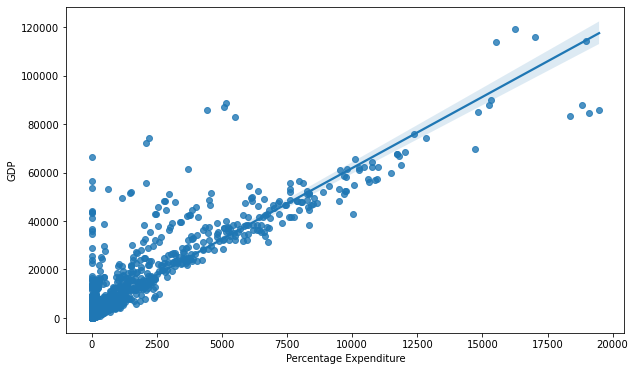

In [167]:
fig=plt.figure(figsize=(10,6))
sns.regplot(y=num_df['GDP'],x=num_df['Percentage Expenditure'])

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
from sklearn.linear_model import LinearRegression

In [170]:
linear_model=LinearRegression()

## Without train_test_split, using reshape(-1,1) to create 2d array that is required for feature


In [171]:
y = num_df.GDP.values.reshape(-1,1)
y

array([[584.25921  ],
       [612.696514 ],
       [631.744976 ],
       ...,
       [ 57.34834  ],
       [548.587312 ],
       [547.3588785]])

In [172]:
x=num_df['Percentage Expenditure'].values.reshape(-1,1)
x

array([[71.27962362],
       [73.52358168],
       [73.21924272],
       ...,
       [ 0.        ],
       [ 0.        ],
       [ 0.        ]])

In [173]:
linear_model.fit(x,y)

LinearRegression()

There is only one coefficient here, stored in an 2d array

In [174]:
linear_model.coef_

array([[5.86912567]])

Pull out that coefficient

In [175]:
linear_model.coef_[0,0]

5.869125667143022

In [176]:
#The interception with Oy
linear_model.intercept_

array([3150.26884219])

In [177]:
# therefore, the interception is
linear_model.intercept_[0]

3150.268842191437

### So our model is $y=3150.27+5.87x$

In [178]:
# r2 score
metrics.r2_score(y,linear_model.predict(x))

0.7887932267744926

## Use train_test_split

- x_train need to be 2d, trick: let it be a dataframe by df[[...]]
- if x is a single feature then use .reshape(-1,1) as above

In [179]:
x=num_df[['Percentage Expenditure']]
y=num_df['GDP']

In [180]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [181]:
# check x_train
x_train

,Percentage Expenditure
2492,720.233393
1222,0.000000
1113,493.327929
310,0.000000
2552,81.727471
...,...
599,93.367890
1599,216.702948
1361,112.541157
1547,15345.490700


In [182]:
lm=LinearRegression()

In [184]:
lm.fit(x_train,y_train)

LinearRegression()

In [185]:
lm.coef_

array([5.84004612])

In [186]:
lm.intercept_

3080.0730280778707

In [187]:
# Our model is
print('y=',lm.intercept_,'+',lm.coef_[0],'x')

y= 3080.0730280778707 + 5.840046121304933 x


In [188]:
x_test

,Percentage Expenditure
1201,19.266157
1628,60.212111
1317,121.586916
1392,59.971858
1308,16.975116
...,...
917,5889.012536
847,234.787421
1886,43.421931
2714,0.000000


In [189]:
y_predict=lm.predict(x_test)

# Compare y_test with y_predict

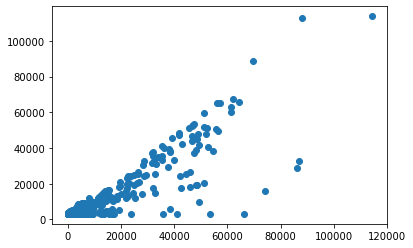

In [190]:
plt.scatter(y_test,y_predict)

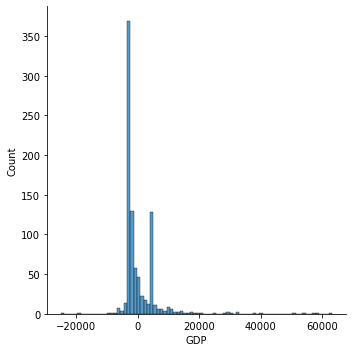

In [191]:
sns.displot((y_test-y_predict))

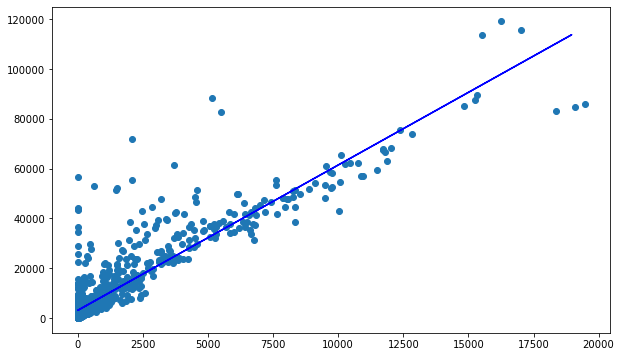

In [192]:
plt.figure(figsize=(10,6))
plt.scatter(x=x_train['Percentage Expenditure'],y=y_train)
plt.plot(x_test['Percentage Expenditure'],y_predict,color='blue')

# Evaluation metrics

In [193]:
from sklearn import metrics

In [194]:
print('Mean absolute error is',metrics.mean_absolute_error(y_test,y_predict))
print('Mean square error is',metrics.mean_squared_error(y_test,y_predict))
print('Roor mean square error is',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

Mean absolute error is 3817.6573655921
Mean square error is 45381183.80674143
Roor mean square error is 6736.55578220365


# r2 score -- Coefficient of determination

Suppose we have y_test and y_predict. The r2 score is computed by
$$1-\frac{\text{mean square error}}{\text{variance of y_test}}$$

by hand

In [219]:
print('r2 score of the model is',1-metrics.mean_squared_error(y_test,y_predict)/np.var(y_test))

r2 score of the model is 0.7536406529259445


by scikit-learn

In [220]:
print('r2 score of the model is',metrics.r2_score(y_test,y_predict))

r2 score of the model is 0.7536406529259443
